In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('activity_data.csv')
df = df.dropna(subset=['r_avg_IC50'])
df.sort_values(by=['r_avg_IC50'],ascending=True,inplace=True)
df = df.drop(df[df['r_avg_IC50']>=99].index)
#print(df)
#df.to_csv('data.txt',sep ='\t', index = False, header = False)

In [2]:
dock = pd.read_csv('scores.csv')
dock = dock.dropna(axis=0, how='all')

dock.rename(columns={'lig_name': 'CID'},inplace = True)
dock['CID'] = dock['CID'].apply(lambda x: x.split('\t')[0])
#print(dock)

df = df[['CID','r_avg_IC50']]
result=pd.merge(df,dock,on='CID')
print(result)

                     CID  r_avg_IC50  LF Rank Score  LF dG  LF VSscore
0    LOR-NOR-30067bb9-11    0.017013         -6.619 -7.150      -8.523
1     JOH-MSK-46727e7b-1    0.025860        -12.022 -8.672     -10.714
2     ALP-POS-c59291d4-5    0.055726         -6.623 -7.229      -8.307
3     MAT-POS-0c8fa4a7-1    0.081067         -7.515 -8.376      -9.565
4     LON-WEI-4d77710c-2    0.099212        -12.156 -7.511      -9.377
..                   ...         ...            ...    ...         ...
348   ALP-POS-902f21bb-2   95.243508         -6.597 -7.731      -8.905
349  BEN-DND-7e92b6ca-11   95.695992         -5.383 -6.276      -7.621
350   MAT-POS-2492181e-4   95.946892         -6.100 -8.238      -9.712
351  JAG-UCB-52b62a6f-19   98.088619        -10.011 -7.496      -9.387
352   MAT-POS-2492181e-6   98.244200         -5.543 -8.013      -9.376

[353 rows x 5 columns]


In [3]:
#test1: exp_rank vs VSscore_rank
test1 = result
test1.sort_values(by=['r_avg_IC50'],ascending=True,inplace=True)
test1 = test1.reset_index(drop=True)
test1 = test1.reset_index(drop=False)
test1.rename(columns={'index':'exp_rank'}, inplace = True)

test1.sort_values(by=['LF Rank Score'],ascending=True,inplace=True)
test1 = test1.reset_index(drop=True)
test1 = test1.reset_index(drop=False)
test1.rename(columns={'index':'Rankscore_rank'}, inplace = True)

print(test1)

     Rankscore_rank  exp_rank                  CID  r_avg_IC50  LF Rank Score  \
0                 0       271   MAT-POS-044491d2-1   38.855927        -14.085   
1                 1        51  LON-WEI-4d77710c-61    0.659520        -13.842   
2                 2       105   LON-WEI-babf2c61-1    2.112801        -13.736   
3                 3       261  LON-WEI-b8d98729-38   32.030614        -13.420   
4                 4       116   MAT-POS-f42f3716-1    2.832000        -13.341   
..              ...       ...                  ...         ...            ...   
348             348       104  MED-COV-4280ac29-13    2.077428         -4.486   
349             349       188   MAK-UNK-af83ef51-2   13.583027         -4.430   
350             350        48   GIA-UNK-20b63697-6    0.643563         -4.388   
351             351        79   JOH-UNI-44664832-2    1.240614         -4.312   
352             352       229   GIA-UNK-a79af1bc-1   19.473886         -4.198   

     LF dG  LF VSscore  
0 

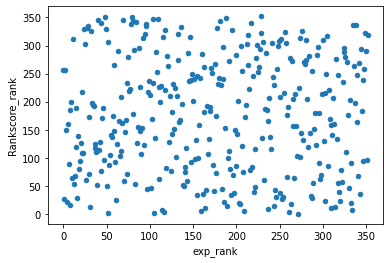

0.020851702553940036


In [6]:
test1.plot(kind='scatter', x='exp_rank', y='Rankscore_rank')
plt.show()

corr = test1.exp_rank.corr(test1.Rankscore_rank)
print(corr)

In [6]:
# kt = 9.83*10^(-22) cal at 20 degree
dG_exp = 9.83*10**(-22)*np.log(test1.r_avg_IC50/result['r_avg_IC50'].max())*(6.02*10**23)
print(dG_exp)

dG_flare = test1['LF dG']-(result['LF dG'].max())
print(dG_flare)

#test2: dG_exp vs dG_flare
test2 = pd.concat([dG_exp, dG_flare], axis=1)
test2.rename(columns={'r_avg_IC50':'dG_exp', 'LF dG': 'dG_flare'},inplace=True)
print(test2)

0     -2750.845177
1     -2445.770491
2      -107.113244
3     -1054.208085
4     -2352.407657
          ...     
348    -914.374523
349   -2006.640706
350   -2692.013619
351    -696.437424
352    -458.933699
Name: r_avg_IC50, Length: 353, dtype: float64
0     -5.170
1     -6.027
2     -2.478
3     -4.219
4     -3.284
       ...  
348   -1.245
349   -1.244
350   -1.372
351   -1.028
352    0.000
Name: LF dG, Length: 353, dtype: float64
          dG_exp  dG_flare
0   -2750.845177    -5.170
1   -2445.770491    -6.027
2    -107.113244    -2.478
3   -1054.208085    -4.219
4   -2352.407657    -3.284
..           ...       ...
348  -914.374523    -1.245
349 -2006.640706    -1.244
350 -2692.013619    -1.372
351  -696.437424    -1.028
352  -458.933699     0.000

[353 rows x 2 columns]


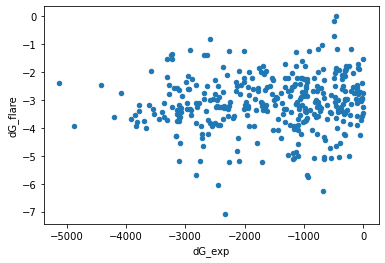

0.08776788005966002


In [7]:
test2.plot(kind='scatter', x='dG_exp', y='dG_flare')
plt.show()

corr1 = test2.dG_exp.corr(test2.dG_flare)
print(corr1)